Bu projede Hindistanda'ki yaklaşık olarak 768 kadın hastanın kaydı bulunan gerçek verileri kullanarak verilerimizi analiz edeceğiz verileri grafiğe dönüştürüp yorum yapacağız ve son olarak ise hastaların diyabet hastası olup olmadığını belirleyeceğiz.

Kişilerin diyabet hastası olup olmadığını bulmak için projemde Support Vector Machine(Destek Vektör Makinesi) algoritmasını , yapay zekayı eğitmek için train_test_split, verilerimi ortak bir aralıkta sandartlandırmak için  StandardScaler, eğittiğimiz ve test ettiğimiz verilerin doğruluk puanları için accuracy_score kullandım.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split #yapay zekayı eğitmek için kullanacağız
from sklearn.preprocessing import StandardScaler # verileri ortak bir aralığa standartlayacağız
from sklearn import svm  #model destek vektörü sınıflandırma için
from sklearn.metrics import accuracy_score #doğruluk puanları için

Verimizi yüklüyoruz ve  DataFrame i oluşturuyoruz.İlk 5 kaydını ekrana getiriyoruz.

Pregnancies -> Daha önce geçirdikleri hamilelik sayısı

Glucose -> Kandaki glikoz miktarı sayısı

BloodPressure	-> Kan basıncı 

SkinThickness -> Deri incelik kalınlık miktarı(Kasta mir miktar yağ veya yağın depolanıp depolanmadığını söyler)

Insulin -> Kandaki insulin

BMI	-> Vücut kitle indeksi

DiabetesPedigreeFunction -> Şeker hastaları ile ilgili kan ölçüm bilgisi

Age -> Yaş

Outcome = 1 Diabet/Şeker Hastası
Outcome = 0 Sağlıklı  
bilgileri bulunmaktadır



In [ ]:
diabet = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
diabet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Veri Setimiz kaç satır ve kaç sütundan olduğunu buluyoruz.

In [ ]:
diabet.shape

(768, 9)

Verilerimiz hakkında bilgi aldık.

In [ ]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Veri setimizin veri tipleri hakkında bilgi alıyoruz.
Verilerim sayısal değerlerdir.

In [ ]:
diabet.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Veri Setimizde boşluk var mı kontrol ediyoruz. Ve boşluk varsa kaç adet olduğunu belirtiyoruz.Yoksa da ekrana fonksiyonu göstermek adına yazıyorum.

In [ ]:
diabet.isnull().values.any()

False

In [ ]:
diabet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Verilerimin sayısal değerlerini  ortalamasını, minimum,
maksimum, standart sapmasını gösteriyoruz.

In [ ]:
diabet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Diyabetik hasta olan ve olmayan kaç kişi var onu görüyoruz

In [ ]:
diabet["Outcome"].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

Diyabetik hasta olan ve olmayanların kişilerin grafiksel görüntüsünu çiziniz?

Grafikte de gördüğümüz gibi sağlıklı insan sayısı sağlıksız insan sayısından fazladır.


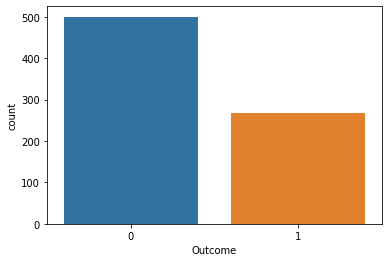

In [ ]:
sns.countplot(x="Outcome",data=diabet)

Heatmap kullanarak korelasyon verilerini gösteriniz ve yorumlayınız.

Buradan Glucose ve Outcome arasındaki korelasyon oranı %47'dir, bu da bize hastalığın Glikoza bağlı olduğunu gösteriyor.

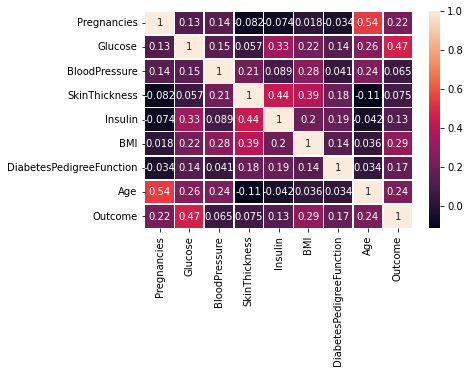

In [ ]:
korelasyon = diabet.corr()
sns.heatmap(korelasyon,annot=True,linewidths=0.5)

Yaş ve Glikoza bağlı olarak şeker hastası olan ve olmayanları gösteren grafiği çiz ve yorumla.

20 ve 30 yaş arasında yoğunluğun daha fazla olduğunu görüyoruz ve glikoz oranı 200 e yaklaştıkça hastalıklı insan sayısı artıyor.

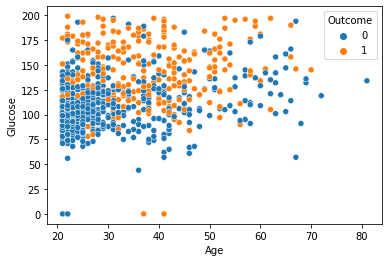

In [ ]:
sns.scatterplot(x="Age",y="Glucose",hue="Outcome",data=diabet);

Vücut kitle indeksi ve deri kalınlığına göre hastalık durumunu çiz ve yorumla.

. Vücut kitle indeksi ve deri kalınlığı değerleri düşük olan kadınlar sağlıklıdır yorumunu yapabiliriz.
. 2 değer de artış gösterirse hastalıklı insan sayısında artış gözlemleniyor.

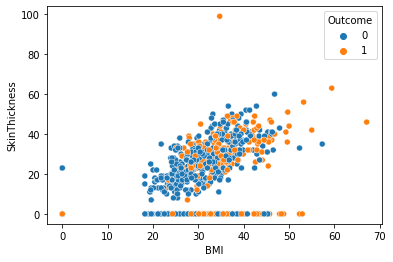

In [ ]:
sns.scatterplot(x="BMI",y="SkinThickness",hue="Outcome",data=diabet);

İnsülin ve glikoz miktarına göre hastalık durumlarını gösteren grafiği çiz ve yorumla.

.Diyabetik hastası olmayan kadınların diyabetik hastası olan kadınlara göre insülin ve glikoz miktarları seviyesinin daha düşük olduğunu görüyoruz.

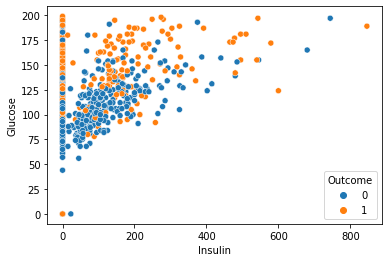

In [ ]:
sns.scatterplot(x="Insulin",y="Glucose",hue="Outcome",data=diabet);

Toplam hamileliğin yaşa göre dağılımı göz önünde bulunduğunda hastalık durumunu  çiz ve yorumla.

.Grafiğe baktığımızda en çok 4. ve 6. hamileliği geçiren  kişilerin 30-50 yaş arasında olup bu kişilerin diabet hastası olduğunu görüyoruz.
.20-30 yaş arası hamile kalan kadınların hastalık sayısı oldukça az görünüyor.

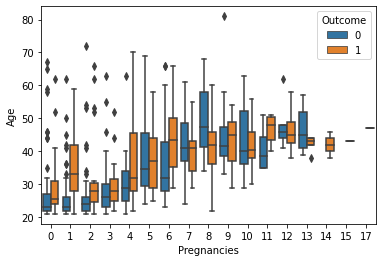

In [ ]:
sns.boxplot(x="Pregnancies",y="Age",hue="Outcome",data=diabet)

Yaşa göre kandaki insülin miktarının hastalık durumunu çiz ve yorumla.

.İnsülin miktarı 0 ila 200 arasında yoğunluk göstermektedir.
.İnsulin miktarları saysına göre sağlıklı insan sayısı hasta insan sayısından fazladır.
.20 ila 70 yaş arası ve insülin oranı 0 olan kişi sayısı oldukça fazladır.

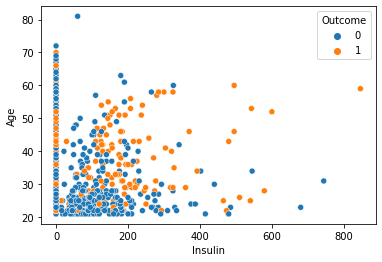

In [ ]:
sns.scatterplot(x="Insulin",y="Age",hue="Outcome",data=diabet)

Vücut kitle indeksi ve kan basıncı değerlerinin insülin arasındaki ilişkiyi  gösterin.

.Kan basıncı 60 ila 85 arasında Vücut kitle indeksi ise 25 ile 40 arasında insulin değerlerinin yoğun olduğunu görüyoruz.
.İnsulin miktarının genellikle 0 olduğunu görebiliyoruz.
İnsülin değeri 750 olan kişinin kan basıncı 85 gibi bir değerde iken Vücut kitle indeksi 52 gibi bir değere sahiptir.

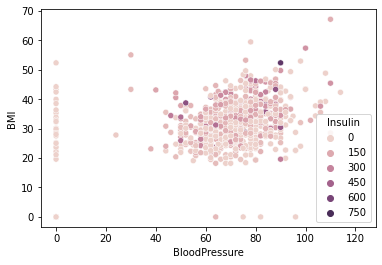

In [ ]:
sns.scatterplot(x="BloodPressure",y="BMI",hue="Insulin",data=diabet)

Glikoz miktarı ve kan ölçüm bilgisi ile ilgili hasta ve sağlıklı insanların yoğun olduğu aralıkları grafikle gösterin ve açıklayın.

.Glikoz miktarı 50 ve 100 arasında olan ve kan ölçüm bilgisi 0 ila 0.5 arasındaki sağlıklı insan sayısının fazla olduğunu görmekteyiz

.Glikoz miktarı arttıkça şeker hastası insan saysının arttığını görüyoruz 


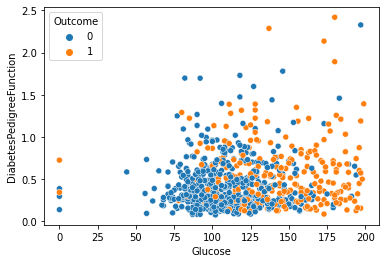

In [ ]:
sns.scatterplot(x="Glucose",y="DiabetesPedigreeFunction",hue="Outcome",data=diabet)


Renklere göre hamilelik sayısı ve vücut kitle indeksine göre hasta ve sağlıklı olma durumunu grafikle çiziniz ve yorumlayınız.

.Hamilelik arttıkça vücut kitle indeksi de doğru orantılı bir şekilde artıyor ve aynı zamanda hasta insan sayısı da artış gösteriyor.
.13 hamilelik ve daha fazla hamilelik yaşayanlar şeker hastasıdır yorumunu yapabiliriz.

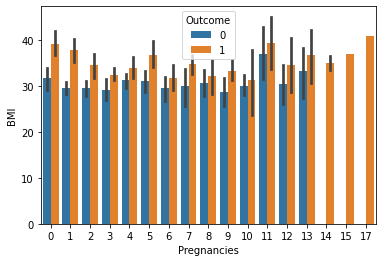

In [ ]:
sns.barplot(x="Pregnancies",y="BMI",hue="Outcome",data=diabet)

barplot da çizdiğimiz grafiğin hamilelik durumuna göre ortalama değerlerini bulduk

In [ ]:
diabet.groupby(["Pregnancies","Outcome"])["BMI"].mean()


Pregnancies  Outcome
0            0          31.727397
             1          39.213158
1            0          29.616038
             1          37.793103
2            0          29.679762
             1          34.578947
3            0          29.231250
             1          32.548148
4            0          31.255556
             1          33.873913
5            0          31.100000
             1          36.780952
6            0          29.591176
             1          31.775000
7            0          29.975000
             1          34.756000
8            0          30.693750
             1          32.204545
9            0          28.840000
             1          33.300000
10           0          30.114286
             1          31.380000
11           0          37.125000
             1          39.385714
12           0          30.560000
             1          34.575000
13           0          33.280000
             1          36.720000
14           1          35.

x ve y değerlerini belirleyeceğiz yani
 y = kişi hasta mı değil mi kontrol edeceğiz 
 x = Bağımlı değişken olan Outcome yani onu siliyoruz ve bağımsız değişkenleri tabloda bırakıyoruz. Çünkü x değerleri içinde gruplandırma yapacağız. 

In [ ]:
x = diabet.drop(["Outcome"],axis=1) 
y = diabet["Outcome"]



In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Verilerimizi belirli bir düzende standarta koyduk böylelikle yaptığımız öğrenme modeli daha iyi tahminler yapmamıza yardımcı olacak


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler()

Tüm verileri ortak bir aralığa dönüştürdük. Değerlerimiz 0 ve 1 aralığında olduğu için daha iyi tahmin yapabiliriz

In [ ]:
standart_veri = scaler.transform(x)
standart_veri

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

X verileri Y ise modelimizi temsil ediyor

In [ ]:
x = standart_veri
y = diabet["Outcome"]


In [ ]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

train datamızı ile test datamızı ayırıyoruz ve
train datamızı sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanıyoruz
test datamızı ise makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye 
test edebilmek için kullandık.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state=1) # stratify=y diyabetik vakaların x testine gitmemesi için kullanıyoruz.

Orijinal verimizde 768 tane var bunlardan 614 tanesi eğitim verisi için 154 tanesi ise bizim test verimiz olacak

In [ ]:
x.shape,x_train.shape,x_test.shape

((768, 8), (614, 8), (154, 8))

Modelimizi eğitiyoruz


In [ ]:
sınıflandırıcı = svm.SVC(kernel='linear')

In [ ]:
sınıflandırıcı.fit(x_train,y_train)

SVC(kernel='linear')

Öncelikle eğitim verilerindeki doğruluk puanlarını bulacağız ve tüm eğitim verilerierini tahmin etmeye çalışacağız

In [ ]:
x_train_tahmin = sınıflandırıcı.predict(x_train)
egitim_verisi_dogruluk = accuracy_score(x_train_tahmin, y_train)

In [ ]:
"Eğitim verilerimizin doğruluk puanı : ",egitim_verisi_dogruluk

('Eğitim verilerimizin doğruluk puanı : ', 0.7833876221498371)

In [ ]:
x_test_tahmin = sınıflandırıcı.predict(x_test)
test_verisi_dogruluk = accuracy_score(x_test_tahmin, y_test)

In [ ]:
"Test verilerimizin doğruluk puanı : ",test_verisi_dogruluk

('Test verilerimizin doğruluk puanı : ', 0.7792207792207793)

Girilen değerlere göre kişinin şeker hastası olup olmadığını makine öğrenmesini modelimizde bulduk.

In [ ]:
veri_girisi = (6,148,72,35,0,33.6,627,50)

veri_girisi_diziyap = np.asarray(veri_girisi) #asarray girilen veriyi diziye çeviriyor.

#diziyi yeniden şekillendiriyoruz. Sadece 1 veriyi tahmin etmeye çalıştığımızı belirtiyoruz.
veri_girisi_sekillendir = veri_girisi_diziyap.reshape(1, -1)

#girilen verileri standartlaştırıyoruz.
std_veri = scaler.transform(veri_girisi_sekillendir)
std_veri

#standartlaştırdığımız verileri tahmin etmek için makine öğrenme modelimizi besliyoruz.
tahmin = sınıflandırıcı.predict(std_veri)
tahmin

if(tahmin[0]==0):
  print("Kişi şeker hastası değil")
else:
  print("Kişi şeker hastası!")

Kişi şeker hastası!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
